# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key
#import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

602

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#OpenWatherMap API Key
#api_key = api_keys.api_key

#starting URL for weather API call
base_URL = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 



In [4]:
#append API data into lists
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

#counter
record = 1

#print statement
print(f"Beginning Data Retrieval")
print(f"----------------------------------")
      
#loop through cities in city list
for city in cities:
      try:
          response = requests.get(f"{base_URL}&q={city}").json()
          city_name.append(response["name"])
          cloudiness.append(response["clouds"]["all"])
          country.append(response["sys"]["country"])
          date.append(response["dt"])
          humidity.append(response["main"]["humidity"])
          max_temp.append(response["main"]["temp_max"])
          lat.append(response["coord"]["lat"])
          lng.append(response["coord"]["lon"])
          wind_speed.append(response["wind"]["speed"])
          city_record = response["name"]
          print(f"Processing Record {record} | {city_record}")
          print(f"{base_URL}&{city}")
      
          record= record + 1
          time.sleep(1.01)
      except:
          print("City not found. Skipping...")
      continue      

Beginning Data Retrieval
----------------------------------
Processing Record 1 | Punta Arenas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0b7b7bbc66bffac8f174ac69c49d76fa&punta arenas
Processing Record 2 | Tuatapere
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0b7b7bbc66bffac8f174ac69c49d76fa&tuatapere
Processing Record 3 | Hasaki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0b7b7bbc66bffac8f174ac69c49d76fa&hasaki
Processing Record 4 | Kijang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0b7b7bbc66bffac8f174ac69c49d76fa&kijang
Processing Record 5 | New Norfolk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0b7b7bbc66bffac8f174ac69c49d76fa&new norfolk
Processing Record 6 | Ancud
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0b7b7bbc66bffac8f174ac69c49d76fa&ancud
City not found. Skipping...
Processing Record 7 | Pimentel
http://api.openweathermap.org/dat

In [11]:
response = requests.get(base_URL)
data = response.json()
print(json.dumps(data, indent=4, sort_keys=True))

{
    "cod": "400",
    "message": "Nothing to geocode"
}


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#create a dictionary with lists generated
weatherpy_dict = {"City": city_name,
                 "Cloudiness": cloudiness,
                 "Country": country,
                 "Date": date,
                 "Humidity": humidity,
                 "Lat": lat,
                 "Lng":lng,
                 "Max Temp": max_temp,
                 "Wind Speed": wind_speed}
#create a data frame
weather_data = pd.DataFrame(weatherpy_dict)

#display count of weather data values
weather_data.count()

City          535
Cloudiness    535
Country       535
Date          535
Humidity      535
Lat           535
Lng           535
Max Temp      535
Wind Speed    535
dtype: int64

In [7]:
#save data frame to CSV
weather_data.to_csv('weather_data.csv')

#display first rows
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Punta Arenas,75,CL,1562187931,74,-53.16,-70.91,33.80,8.05
1,Tuatapere,90,NZ,1562187933,81,-46.13,167.69,46.00,3.00
2,Hasaki,75,JP,1562187935,100,35.73,140.83,75.20,8.05
3,Kijang,34,KR,1562187936,93,35.24,129.21,66.20,4.70
4,New Norfolk,20,AU,1562187937,86,-42.78,147.06,39.99,4.70


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

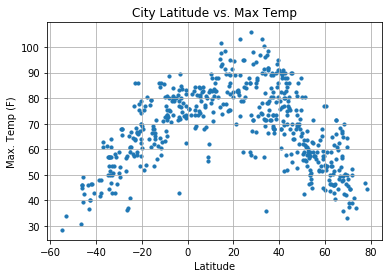

In [14]:
#build scatter plot 
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=10)

#graph properties
plt.title("City Latitude vs. Max Temp")
plt.ylabel("Max. Temp (F)")
plt.xlabel("Latitude")
plt.grid(True)

#save figure
plt.savefig("Max_Temp_vs_Latitude.png")

#show plot
plt.show()

#### Latitude vs. Humidity Plot

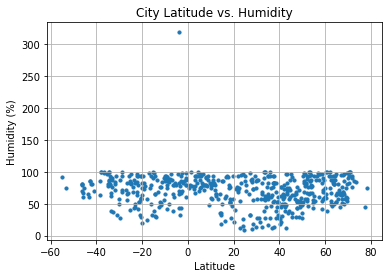

In [17]:
#build plot
plt.scatter(weather_data["Lat"],weather_data["Humidity"], marker="o", s=10)

#other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#save figure
plt.savefig("Humidity_vs_Latitude.png")

#show
plt.show()

#### Latitude vs. Cloudiness Plot

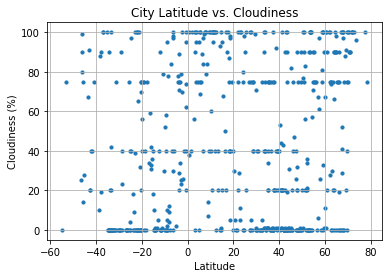

In [18]:
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=10)

plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Cloudiness_vs_Latitude.png")

plt.show()

#### Latitude vs. Wind Speed Plot

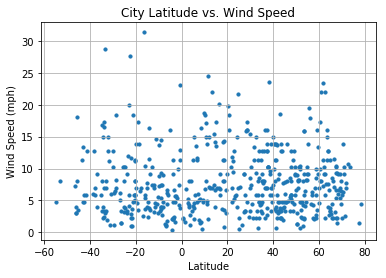

In [19]:
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=10)

plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Wind_Speed_vs_Latitude.png")

plt.show()